In [454]:
#Author: Sachit Mahajan

#Exploratory Data Analysis and ML for prediction

#Packages to be installed: pandas, plotly,numpy, matplotlib, pandas_profiling, mljar-supervised
import numpy as np
import pandas as pd
import sklearn
import matplotlib
import statsmodels.api as sm
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_error
from supervised.automl import AutoML
from pandas_profiling import ProfileReport
import matplotlib.pyplot as plt
from matplotlib import rcParams
%matplotlib inline

In [455]:
df = pd.read_csv('/Users/sachitmahajan/Downloads/test_up.csv') #dataset with clean headers and simplified variable names
#In case we have multiple data-sets related to same sensor bit for different time periods, we can combine them by using Pandas 'pd.concat' function. for example we have df1 and df2:
#combined_df = pd.concat([df1, df2], ignore_index=TRUE)

In [456]:
df = df.loc[1:].copy()

In [457]:
df["Date"] = pd.to_datetime(df['Date'])

In [458]:
df = df.set_index(['Date'])

In [459]:
df = df.apply(pd.to_numeric)

In [460]:
#Analysing the dataframe
df #Shows first 5 and last 5 values
df.shape # data dimension
df.isnull().sum() #to check for missing values

MP1_WQ_DO       665
MP1_WQ_NH4     1029
MP1_WQ_PH       666
MP1_WQ_TEMP     666
dtype: int64

In [461]:
df.dtypes

MP1_WQ_DO      float64
MP1_WQ_NH4     float64
MP1_WQ_PH      float64
MP1_WQ_TEMP    float64
dtype: object

In [462]:
df_cleaned = df.dropna()
#df_cleaned = df.fillna(0) #to replace missing values with zero
#df_cleaned.to_csv('clean_data, index=FALSE') #to wite the clean data to csv

In [463]:
df_cleaned

MP1_WQ_DO  MP1_WQ_NH4  MP1_WQ_PH  MP1_WQ_TEMP
Date                                                              
2019-09-23 00:05:00       9.83        0.28       7.84         9.47
2019-09-23 00:10:00       9.84        0.28       7.84         9.45
2019-09-23 00:15:00       9.84        0.28       7.84         9.44
2019-09-23 00:20:00       9.84        0.28       7.84         9.43
2019-09-23 00:25:00       9.83        0.29       7.85         9.42
...                        ...         ...        ...          ...
2020-10-07 23:40:00      10.71        0.16       7.70        10.49
2020-10-07 23:45:00      10.71        0.16       7.70        10.49
2020-10-07 23:50:00      10.71        0.15       7.70        10.49
2020-10-07 23:55:00      10.72        0.15       7.70        10.49
2020-10-08 00:00:00      10.71        0.16       7.70        10.50

[107123 rows x 4 columns]

In [464]:
df_cleaned.describe() #basic dataset statistics

MP1_WQ_DO     MP1_WQ_NH4      MP1_WQ_PH    MP1_WQ_TEMP
count  107123.000000  107123.000000  107123.000000  107123.000000
mean       10.971872       0.386898       7.811943       9.173394
std         0.976603       0.211421       0.142103       3.255939
min         3.970000       0.000000       7.290000       1.490000
25%        10.230000       0.220000       7.730000       6.490000
50%        11.070000       0.330000       7.810000       8.170000
75%        11.680000       0.500000       7.880000      12.010000
max        14.580000       2.560000       8.650000      18.200000

In [465]:
df_cleaned['Year'] = df_cleaned.index.year
df_cleaned['Month'] = df_cleaned.index.month
df_cleaned['Weekday Name'] = df_cleaned.index.day_name()

df_cleaned.sample(5)

MP1_WQ_DO  MP1_WQ_NH4  MP1_WQ_PH  MP1_WQ_TEMP  Year  \
Date                                                                       
2020-03-10 05:55:00      11.12        0.25       7.66         7.56  2020   
2019-11-06 04:15:00      11.86        0.22       7.89         4.41  2019   
2020-04-30 04:55:00      10.37        0.45       7.60         8.36  2020   
2020-02-17 21:00:00      11.53        0.18       7.69         6.25  2020   
2020-08-16 03:35:00       9.21        0.41       7.74        13.96  2020   

                     Month Weekday Name  
Date                                     
2020-03-10 05:55:00      3      Tuesday  
2019-11-06 04:15:00     11    Wednesday  
2020-04-30 04:55:00      4     Thursday  
2020-02-17 21:00:00      2       Monday  
2020-08-16 03:35:00      8       Sunday

In [466]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(rc={'figure.figsize':(11, 4)})

In [467]:
#Histogram (Similar histograms can be created by replacing the 'x' variable with the name of the variable that you want to plot)
histogram = px.histogram(df_cleaned, x="MP1_WQ_NH4")
histogram.show()

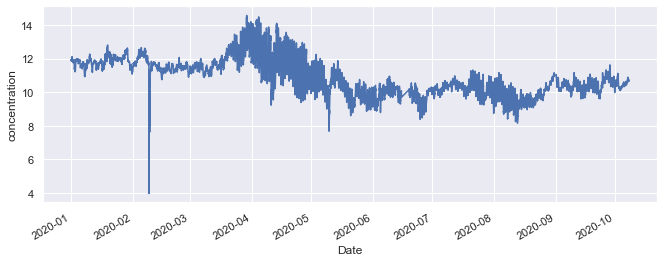

In [468]:
#Plotting yearly data for a particular variable
ax = df_cleaned.loc['2020', 'MP1_WQ_DO'].plot()
ax.set_ylabel('concentration');

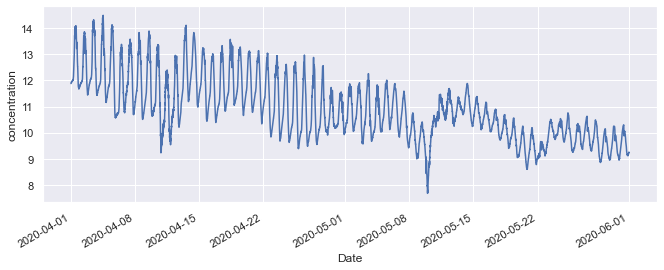

In [469]:
#plotting data for more finer details, date range can be changed to do a detailed analysis
ax = df_cleaned.loc['2020-04':'2020-05', 'MP1_WQ_DO'].plot()
ax.set_ylabel('concentration');

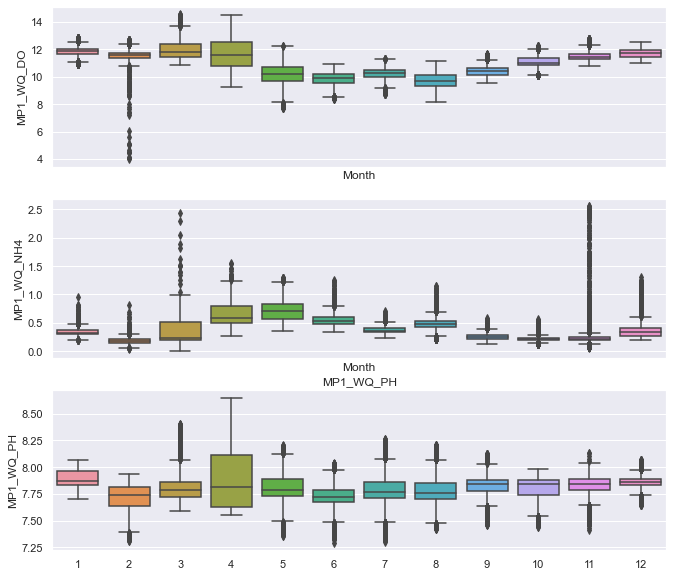

In [470]:
#Understanding yearly seasonality
fig, axes = plt.subplots(3, 1, figsize=(11, 10), sharex=True)
for name, ax in zip(['MP1_WQ_DO', 'MP1_WQ_NH4', 'MP1_WQ_PH'], axes):
    sns.boxplot(data=df_cleaned, x='Month', y=name, ax=ax)
ax.set_ylabel('MP1_WQ_PH')
ax.set_title(name)
if ax != axes[1]:
    ax.set_xlabel('')


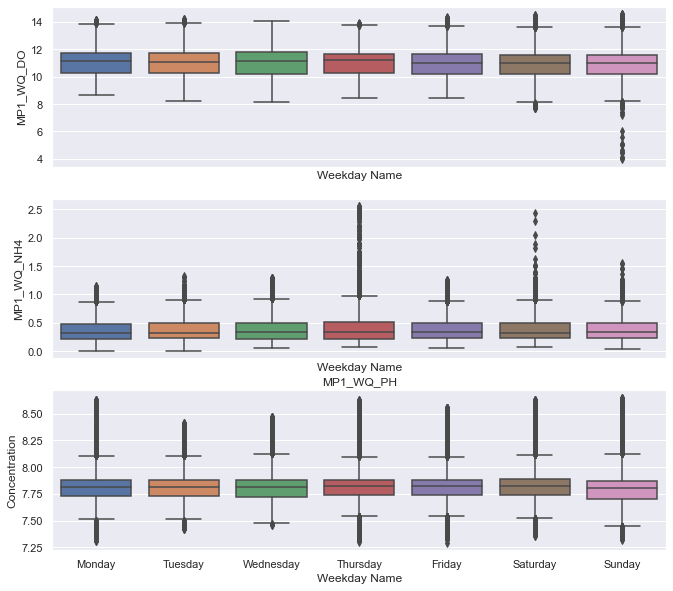

In [471]:
#Understanding weekday seasonality
fig, axes = plt.subplots(3, 1, figsize=(11, 10), sharex=True)
for name, ax in zip(['MP1_WQ_DO', 'MP1_WQ_NH4', 'MP1_WQ_PH'], axes):
    sns.boxplot(data=df_cleaned, x='Weekday Name', y=name, ax=ax)
ax.set_ylabel('Concentration')
ax.set_title(name)
if ax != axes[-1]:
    ax.set_xlabel('')



In [472]:
x = df_cleaned.resample('3600S').mean()
print(x)

                     MP1_WQ_DO  MP1_WQ_NH4  MP1_WQ_PH  MP1_WQ_TEMP    Year  \
Date                                                                         
2019-09-23 00:00:00   9.854545    0.286364   7.849091     9.406364  2019.0   
2019-09-23 01:00:00   9.898333    0.292500   7.866667     9.312500  2019.0   
2019-09-23 02:00:00   9.923333    0.300000   7.871667     9.255833  2019.0   
2019-09-23 03:00:00   9.916667    0.300000   7.877500     9.216667  2019.0   
2019-09-23 04:00:00   9.968333    0.300000   7.884167     9.172500  2019.0   
...                        ...         ...        ...          ...     ...   
2020-10-07 20:00:00  10.683333    0.159167   7.719167    10.712500  2020.0   
2020-10-07 21:00:00  10.700833    0.160000   7.709167    10.625000  2020.0   
2020-10-07 22:00:00  10.710833    0.158333   7.709167    10.540833  2020.0   
2020-10-07 23:00:00  10.708333    0.153333   7.703333    10.492500  2020.0   
2020-10-08 00:00:00  10.710000    0.160000   7.700000    10.5000

In [473]:
#Specify the columns
data_columns = ['MP1_WQ_DO', 'MP1_WQ_NH4', 'MP1_WQ_PH', 'MP1_WQ_TEMP']
# Resample to daily frequency, aggregating with mean
data_daily_mean = df_cleaned.resample('D').mean()
data_daily_mean.head(5)


MP1_WQ_DO  MP1_WQ_NH4  MP1_WQ_PH  MP1_WQ_TEMP    Year  Month
Date                                                                    
2019-09-23  10.004878    0.308571   7.954495     9.638014  2019.0    9.0
2019-09-24   9.909062    0.362465   7.824931    10.486806  2019.0    9.0
2019-09-25  10.206042    0.369375   7.935486     9.940625  2019.0    9.0
2019-09-26  10.233299    0.328264   7.866563    10.110000  2019.0    9.0
2019-09-27  10.421875    0.306042   7.884410     9.410521  2019.0    9.0

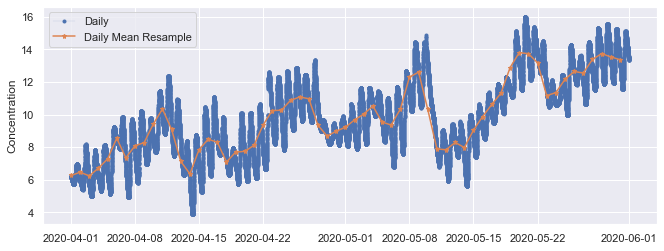

In [474]:
#Start and end of the date range to extract
start, end = '2020-04', '2020-05'
# Plot daily and daily resampled time series together
fig, ax = plt.subplots()
ax.plot(df_cleaned.loc[start:end, 'MP1_WQ_TEMP'],
marker='.', linestyle='-', linewidth=0.1, label='Daily')
ax.plot(data_daily_mean.loc[start:end, 'MP1_WQ_TEMP'],
marker='*', markersize=5, linestyle='-', label='Daily Mean Resample')
ax.set_ylabel('Concentration')
ax.legend();

In [475]:
#rolling windows. The values is at the midpoint of 7 values
data_7v = data_daily_mean[data_columns].rolling(7, center=True).mean()
data_7v.head(10)

MP1_WQ_DO  MP1_WQ_NH4  MP1_WQ_PH  MP1_WQ_TEMP
Date                                                     
2019-09-23        NaN         NaN        NaN          NaN
2019-09-24        NaN         NaN        NaN          NaN
2019-09-25        NaN         NaN        NaN          NaN
2019-09-26  10.258465    0.334786   7.837393     9.779667
2019-09-27  10.360238    0.330590   7.801121     9.669405
2019-09-28  10.478388    0.320799   7.777852     9.416905
2019-09-29  10.624003    0.302669   7.757485     9.056820
2019-09-30  10.777411    0.288924   7.754777     8.596815
2019-10-01  10.845957    0.277163   7.748864     8.409921
2019-10-02  10.926771    0.264355   7.758423     8.166086

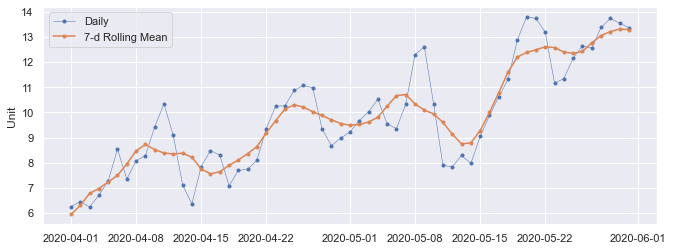

In [476]:
start, end = '2020-04', '2020-05'
# Plot daily and 7-day rolling mean time series together
fig, ax = plt.subplots()
ax.plot(data_daily_mean.loc[start:end, 'MP1_WQ_TEMP'],
marker='.', linestyle='-', linewidth=0.5, label='Daily')
ax.plot(data_7v.loc[start:end, 'MP1_WQ_TEMP'],
marker='.', linestyle='-', label='7-d Rolling Mean')
ax.set_ylabel('Unit')
ax.legend();

In [477]:
profile = ProfileReport(
    df_cleaned, html={"style": {"full_width": True}}, sort=None
)

In [478]:
design_report = ProfileReport(df)
design_report.to_file(output_file='report.html')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [479]:
#This produces a descriptive report that explains in detail the complete dataset, interactions, correlations.
#You can toggle details to explore the data
design_report 

In [485]:
up = pd.DataFrame(df_cleaned)

In [486]:
#Regression example on dataset
import sklearn
X = up.drop('MP1_WQ_TEMP', axis = 1)
y = up['MP1_WQ_TEMP']

In [487]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)


In [488]:
automl = AutoML(mode="Explain")
automl.fit(X_train, y_train)

Linear algorithm was disabled.
AutoML directory: AutoML_4
The task is regression with evaluation metric rmse
AutoML will use algorithms: ['Baseline', 'Decision Tree', 'Random Forest', 'Xgboost', 'Neural Network']
AutoML will ensemble available models
AutoML steps: ['simple_algorithms', 'default_algorithms', 'ensemble']
* Step simple_algorithms will try to check up to 2 models
1_Baseline rmse 3.241357 trained in 0.78 seconds
2_DecisionTree rmse 1.339987 trained in 5.18 seconds
* Step default_algorithms will try to check up to 3 models
There was an error during 3_Default_Xgboost training.
Please check AutoML_4/errors.md for details.
4_Default_NeuralNetwork rmse 0.540344 trained in 7.1 seconds
5_Default_RandomForest rmse 1.068989 trained in 10.2 seconds
* Step ensemble will try to check up to 1 model
Ensemble rmse 0.540344 trained in 0.28 seconds
AutoML fit time: 34.47 seconds
AutoML best model: 4_Default_NeuralNetwork


AutoML()

In [489]:
# compute the MSE on test data. The final reports explaining model details, plots and learning curves are all saved locally as "AutoML_X" where X is the number
# The report folder also includes CSV files of actual and predicted data as well as feature importance
predictions = automl.predict(X_test)
print("Test MSE:", mean_squared_error(y_test, predictions))

Test MSE: 0.29598979963957034
